In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
import keras

In [0]:
# reading the data from the dataset
data = pd.read_csv("dataset.csv")

In [0]:
#keeping only the temperature column on the data
data =  data.drop(data.iloc[:,0:11].columns, axis = 1)
data = data.drop(data.iloc[:,1:].columns,axis =1)

In [0]:
data = data.rename(columns={data.columns[0]: "temperature(C)"})
data = data.dropna(axis=0) # making sure null values are removed
data= data.reset_index(drop=True)
# training data with 90991 data points
training_data = data.iloc[: 90991]
# testing data with 10000 data points
testing_data = data.iloc[90991:]

In [0]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
training_data_normalized = scaler.fit_transform(training_data)

In [0]:
X_train = []
y_train = []
next_days = 4 # next 4 days temperature forecast
past_days = 30 # Past 30 days 
for i in range(0,len(training_data_normalized)-past_days-next_days+1):
    X_train.append(training_data_normalized[i : i + past_days , 0])     
    y_train.append(training_data_normalized[i + past_days : i + past_days + next_days , 0 ])

In [0]:
X_train , y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], 1) )

# Traning for 35 Epochs

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout

model = Sequential()
model.add(LSTM(units=30, input_shape = (X_train.shape[1],1)))
model.add(Dense(units = next_days,activation='softmax'))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
history = model.fit(X_train, y_train, epochs=35,batch_size=100 )


Epoch 1/5
90958/90958 [==============================] - 51s 564us/step - loss: 0.0097 - acc: 0.4456
Epoch 2/5
90958/90958 [==============================] - 51s 555us/step - loss: 0.0095 - acc: 0.5526
Epoch 3/5
90958/90958 [==============================] - 51s 564us/step - loss: 0.0095 - acc: 0.5756
Epoch 4/5
90958/90958 [==============================] - 49s 543us/step - loss: 0.0094 - acc: 0.5813
Epoch 5/5
90958/90958 [==============================] - 49s 534us/step - loss: 0.0094 - acc: 0.5962


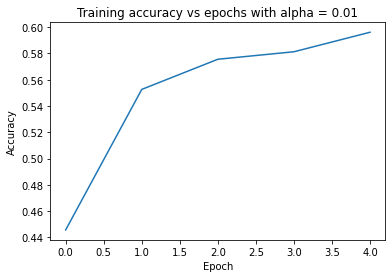

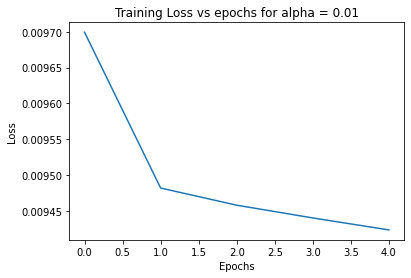

In [0]:
#Plotting testing accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('Training accuracy vs epochs with alpha = 0.01')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#Plotting training accuracy and loss
plt.plot(history.history['loss'])
plt.title('Training Loss vs epochs for alpha = 0.01')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [0]:
print(f"Training accuracy 35 epochs lr 0.001: {history.history['acc'][-1] * 100} " )
print(f"Training loss 35 epochs lr 0.001: {history.history['loss'][-1]} " )

Training accuracy 35 epochs lr 0.001: 59.617626667022705 
Training loss 35 epochs lr 0.001: 0.009423172967068771 


### Testing the model

In [0]:
# Normalizing and reshaping the test data
testing = testing_data[:30].values
y_test = testing_data[30:34].values

x_test = scaler.transform(testing)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[1],x_test.shape[0],1))

y_test = scaler.transform(y_test)
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[1],y_test.shape[0]))


In [0]:
# Evaluating the model on test data
score = model.evaluate(x_testing , y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0029748021624982357
Test accuracy: 1.0


# Training for 20 Epochs

In [0]:
#LSTM Model training with 20 epochs
model_20 = Sequential()
model_20.add(LSTM(units=30, input_shape = (X_train.shape[1],1) ) )
model_20.add(Dense(units = next_days,activation='softmax'))
model_20.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
history_20 = model.fit(X_train, y_train, epochs= 20,batch_size=100 )


Epoch 1/10
90958/90958 [==============================] - 48s 528us/step - loss: 0.0094 - acc: 0.6078
Epoch 2/10
90958/90958 [==============================] - 48s 525us/step - loss: 0.0094 - acc: 0.6095
Epoch 3/10
90958/90958 [==============================] - 48s 527us/step - loss: 0.0094 - acc: 0.6130
Epoch 4/10
90958/90958 [==============================] - 47s 520us/step - loss: 0.0094 - acc: 0.6162
Epoch 5/10
90958/90958 [==============================] - 48s 525us/step - loss: 0.0094 - acc: 0.6187
Epoch 6/10
90958/90958 [==============================] - 47s 518us/step - loss: 0.0094 - acc: 0.6190
Epoch 7/10
90958/90958 [==============================] - 48s 526us/step - loss: 0.0094 - acc: 0.6234
Epoch 8/10
90958/90958 [==============================] - 48s 524us/step - loss: 0.0094 - acc: 0.6253
Epoch 9/10
90958/90958 [==============================] - 47s 522us/step - loss: 0.0094 - acc: 0.6301
Epoch 10/10
90958/90958 [==============================] - 47s 521us/step - loss: 

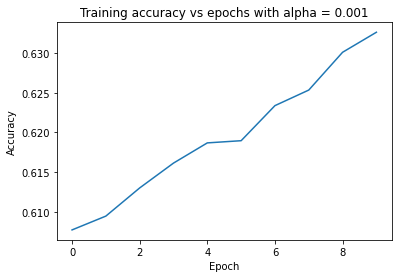

In [0]:
#Plotting training accuracy vs epochs
import matplotlib.pyplot as plt
plt.plot(history_20.history['acc'])
plt.title('Training accuracy vs epochs with alpha = 0.001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

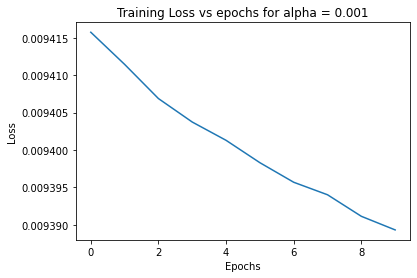

In [0]:
#Plotting training loss vs epochs
import matplotlib.pyplot as plt
plt.plot(history_20.history['loss'])
plt.title('Training Loss vs epochs for alpha = 0.001')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

#Testing

In [0]:
# Evaluating the model on test data
score_20 = model_20.evaluate(x_testing , y_test, verbose=0)
print('Test loss:', score_20[0])
print('Test accuracy:', score_20[1])

Test loss: 0.003754070959985256
Test accuracy: 0.0
